In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('swiggy.csv')
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


id - Every restaurant is having a unique ID  
name - Name of the Restaurant  
city - The city where the restaurant is located  
rating - Rating of the Restaurant  
rating_count - Number of People given the Rating  
cost - Cost of eating in that restaurant  
cuisine - Cuisines that restaurant serves  
lic_no - License number of that restaurant  
link - Restaurant link on Swiggy website  
address - Full address of the restaurant  

In [8]:
# no.of rows and columns
df.shape

(148541, 11)

In [9]:
# Null values
df.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [10]:
# dropping null values for column with no names
df.dropna(subset=['name'], inplace=True)

In [11]:
# Any duplicate values
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148455 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148455 non-null  int64 
 1   name          148455 non-null  object
 2   city          148455 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148455 non-null  object
 9   address       148455 non-null  object
 10  menu          148455 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.6+ MB


In [13]:
df['cost'].unique()

array(['₹ 200', '₹ 100', '₹ 250', '₹ 150', '₹ 300', '₹ 700', '₹ 650',
       '₹ 400', '₹ 350', '₹ 60', '₹ 110', '₹ 399', '₹ 249', '₹ 500',
       '₹ 99', '₹ 120', '₹ 499', '₹ 299', '₹ 199', '₹ 50', '₹ 180',
       '₹ 349', '₹ 1000', '₹ 599', '₹ 600', '₹ 800', '₹ 450', '₹ 149',
       '₹ 290', '₹ 175', '₹ 125', '₹ 8', '₹ 375', '₹ 275', '₹ 425',
       '₹ 225', '₹ 325', '₹ 75', '₹ 160', '₹ 550', '₹ 220', '₹ 20',
       '₹ 59', '₹ 1200', '₹ 210', '₹ 30', '₹ 310', '₹ 70', '₹ 170',
       '₹ 449', '₹ 280', '₹ 320', '₹ 1300', '₹ 850', '₹ 900', '₹ 40',
       '₹ 1500', '₹ 140', '₹ 1100', '₹ 410', '₹ 80', '₹ 10', '₹ 1245',
       '₹ 510', '₹ 90', '₹ 260', '₹ 1800', '₹ 5', '₹ 240', '₹ 460',
       '₹ 1900', '₹ 352', '₹ 298', '₹ 2', '₹ 252', '₹ 330', '₹ 750',
       '₹ 130', '₹ 2000', '₹ 198', '₹ 230', '₹ 999', '₹ 3999', nan,
       '₹ 235', '₹ 1600', '₹ 55', '₹ 179', '₹ 129', '₹ 360', '₹ 85',
       '₹ 248', '₹ 270', '₹ 25', '₹ 159', '₹ 370', '₹ 1050', '₹ 49',
       '₹ 699', '₹ 340', '₹ 190', 

In [14]:
#changing the datatype of cost
df['cost'] = df['cost'].str.replace('₹ ', '').str.strip().astype(float)

In [15]:
df['cost'].fillna(df['cost'].mean(), inplace= True)
df['cost']

C:\Users\bhata\AppData\Local\Temp\ipykernel_18228\2461087886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cost'].fillna(df['cost'].mean(), inplace= True)


0         200.0
1         200.0
2         100.0
3         250.0
4         250.0
          ...  
148536    200.0
148537    300.0
148538    300.0
148539    250.0
148540    200.0
Name: cost, Length: 148455, dtype: float64

In [16]:
df['cost'] = df['cost'].astype(int)
df['cost']

0         200
1         200
2         100
3         250
4         250
         ... 
148536    200
148537    300
148538    300
148539    250
148540    200
Name: cost, Length: 148455, dtype: int32

In [17]:
df['rating'].unique()

array(['--', '4.4', '3.8', '3.7', '3.6', '4.0', '4.2', '4.7', '4.1',
       '3.5', '3.1', '3.4', '3.3', '4.8', '3.9', '2.7', '4.3', '2.9',
       '4.5', '2.5', '3.2', '2.4', '4.6', '3.0', '2.8', '2.3', '5.0',
       '2.6', '2.2', '1.4', '1.9', '4.9', '2.1', '1.3', '2.0', '1.8',
       '1.6', '1.1', '1.5', '1.0', '1.2', '1.7'], dtype=object)

In [18]:
#changing data type of rating
df['rating'] = df['rating'].replace('--', np.nan)
df['rating'] = pd.to_numeric(df['rating'])
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,NaN,Too Few Ratings,200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,NaN,Too Few Ratings,250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,NaN,Too Few Ratings,200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,NaN,Too Few Ratings,300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,NaN,Too Few Ratings,300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,NaN,Too Few Ratings,250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [19]:
df['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [20]:
rating_count_mapping = {
    'Too Few Ratings': 1,
    '10+ ratings': 10,
    '20+ ratings': 20,
    '50+ ratings': 50,
    '100+ ratings': 100,
    '500+ ratings' : 500, 
    '1K+ ratings' : 1000, 
    '5K+ ratings' : 5000, 
    '10K+ ratings' : 10000    
}

df['rating_num'] = df['rating_count'].map(rating_count_mapping)

In [21]:
#Removing redundant columns 
df_new = df.drop(['lic_no', 'link'], axis=1)
df_new


,id,name,city,rating,rating_count,cost,cuisine,address,menu,rating_num
0,567335,AB FOODS POINT,Abohar,NaN,Too Few Ratings,200,"Beverages,Pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,1
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200,"Sweets,Bakery","Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,50
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100,Beverages,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,100
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250,"Fast Food,Indian","Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,20
4,543530,GRILL MASTERS,Abohar,NaN,Too Few Ratings,250,"Italian-American,Fast Food","GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,1
...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,NaN,Too Few Ratings,200,"Fast Food,Snacks","The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json,1
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,NaN,Too Few Ratings,300,Pizzas,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json,1
148538,559435,Cafe Bella Ciao,Yavatmal,NaN,Too Few Ratings,300,"Fast Food,Snacks","Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json,1
148539,418989,GRILL ZILLA,Yavatmal,NaN,Too Few Ratings,250,Continental,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json,1


In [22]:
#Summary
summary = df.describe(include=np.number)
summary

,id,rating,cost,rating_num
count,148455.000000,61441.000000,148455.000000,148455.000000
mean,363505.888875,3.894461,287.600532,58.953784
std,167881.172922,0.460058,796.609925,225.011939
min,211.000000,1.000000,1.000000,1.000000
25%,233518.000000,3.700000,200.000000,1.000000
50%,412698.000000,4.000000,250.000000,1.000000
75%,502244.000000,4.200000,300.000000,50.000000
max,581031.000000,5.000000,300350.000000,10000.000000


In [23]:
cusines = df['cuisine'].str.split(',', expand=True)
cusines

,0,1
0,Beverages,Pizzas
1,Sweets,Bakery
2,Beverages,None
3,Fast Food,Indian
4,Italian-American,Fast Food
...,...,...
148536,Fast Food,Snacks
148537,Pizzas,None
148538,Fast Food,Snacks
148539,Continental,None


In [24]:
cusines[1].unique()

array(['Pizzas', 'Bakery', None, 'Indian', 'Fast Food', 'Chaat',
       'Beverages', 'Desserts', 'Chinese', 'North Indian', 'Tandoor',
       'American', 'Thalis', 'Snacks', 'South Indian', 'Italian',
       'Street Food', 'Kebabs', 'Biryani', 'Salads', 'Pastas',
       'Continental', 'Bengali', 'Burgers', 'Ice Cream', 'Tibetan',
       'Thai', 'Hyderabadi', 'Sweets', 'Lebanese', 'Nepalese', 'Mughlai',
       'Lucknowi', 'Healthy Food', 'Afghani', 'Asian', 'Combo', 'Seafood',
       'Waffle', 'Italian-American', 'Punjabi', 'Arabian', 'Barbecue',
       'Mexican', 'Ice Cream Cakes', 'Gujarati', 'Juices', 'Jain',
       'Pan-Asian', 'Rajasthani', 'Mediterranean', 'Burmese', 'Oriental',
       'Maharashtrian', 'Kerala', 'Home Food', 'Indonesian',
       'Middle Eastern', 'Grill', 'Japanese', 'Paan',
       'Biryani - Shivaji Military Hotel', 'Greek', 'Cafe',
       'Use Code JUMBO30 to avail', 'Chettinad', 'Coastal', 'Andhra',
       'Turkish', 'African', 'Tex-Mex', 'Oriya', 'British', 'M

In [25]:
cusines_counts = cusines.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
cusines_counts

Chinese                    36464.0
North Indian               32537.0
Indian                     25716.0
Snacks                     17231.0
Biryani                    14523.0
                            ...   
Grocery products               1.0
Khasi                          1.0
MAX 2 Combos per Order!        1.0
Meat                           1.0
indian                         1.0
Length: 127, dtype: float64

<Axes: ylabel='cost'>

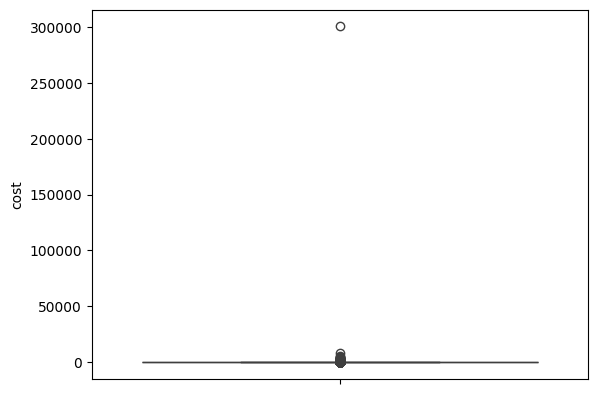

In [26]:
sns.boxplot(df['cost'])

In [27]:
q1 = df['cost'].quantile(0.25)
q3 = df['cost'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3 + 1.5*iqr
upper

450.0

In [28]:
df['cost'].sort_values(ascending=False)

70762     300350
21626       8000
47552       6000
47817       5023
107779      5000
           ...  
142772         1
146288         1
103032         1
43814          1
111609         1
Name: cost, Length: 148455, dtype: int32

In [29]:
max_cost = df['cost'].max()
median_cost = df[df['cost'] != max_cost]['cost'].median()
df.loc[df['cost'] == max_cost, 'cost'] = median_cost

<Axes: xlabel='cost', ylabel='Count'>

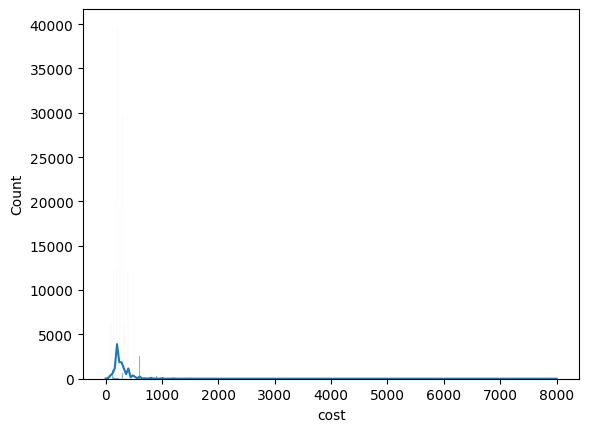

In [30]:
sns.histplot(df['cost'], kde=True)

# Data Visualization

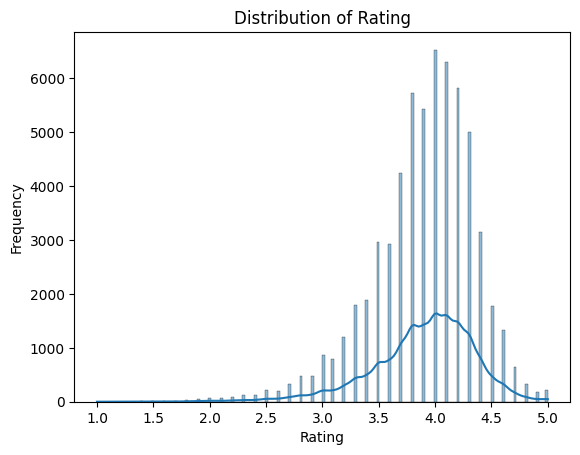

In [31]:
#Distribution of rating
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

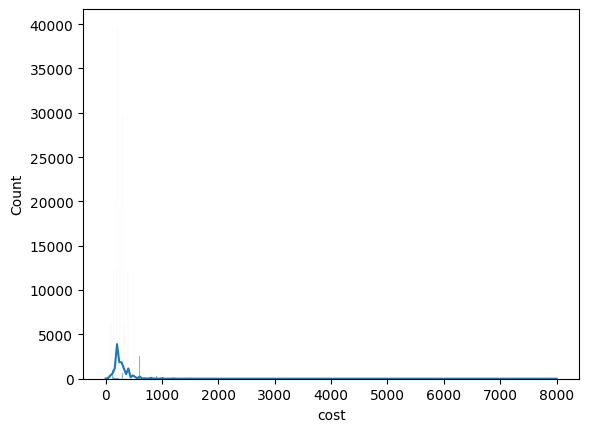

In [32]:
#Distribution of cost
sns.histplot(df['cost'], kde=True)
plt.show()

<Axes: ylabel='cost'>

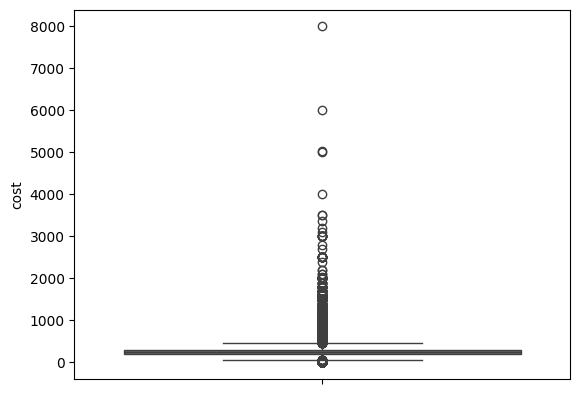

In [33]:
sns.boxplot(df['cost'])

In [34]:
df['city'].unique()

array(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra',
       'Vastrapur,Ahmedabad', 'GOTA,Ahmedabad',
       'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad',
       'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad',
       'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad',
       'Science City,Ahmedabad', 'Maninagar,Ahmedabad',
       'Chandkheda,Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola',
       'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Alwar',
       'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar',
       'Anand', 'Anantapur', 'Ankleshwar', 'Arakkonam', 'Arambagh',
       'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad',
       'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra',
       'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore',
       'Ballari', 'Balrampur', 'Balurghat', 'Banda',
       'Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore',
       'Koramangala,Bangalore', 'JP Nagar,B

In [35]:
df['city_final'] = np.where(df['city'].str.contains(','), df['city'].str.split(',').str[-1], df['city'])

In [36]:
df['city_final'].unique()

array(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra',
       'Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola', 'Alappuzha',
       'Aligarh', 'Alipurduar', 'Allahabad', 'Alwar', 'Ambala',
       'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar', 'Anand',
       'Anantapur', 'Ankleshwar', 'Arakkonam', 'Arambagh', 'Arrah',
       'Aruppukottai', 'Asansol', 'Aurangabad', 'Aurangabad_bihar',
       'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra', 'Bahadurgarh',
       'Bahraich', 'Balaghat', 'Balangir', 'Balasore', 'Ballari',
       'Balrampur', 'Balurghat', 'Banda', 'Bangalore', 'Bantwal',
       'Bapatlachirala', 'Baramati', 'Baran', 'Bardhaman', 'Bardoli',
       'Bareilly', 'Barmer', 'Barnala', 'Barshi', 'Barwani', 'Basirhat',
       'Basti', 'Batala', 'Bathinda', 'Beawar', 'Beed', 'Begusarai',
       'Bela-pratapgarh', 'Belgaum', 'Berhampore', 'Berhampur', 'Bettiah',
       'Betul', 'Bhadohi', 'Bhadrachalam', 'Bhagalpur', 'Bhandara',
       'Bharabanki', 'Bharat

In [37]:
df['city_final'].replace('Noida-1', 'Noida', inplace=True)

C:\Users\bhata\AppData\Local\Temp\ipykernel_18228\863205882.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city_final'].replace('Noida-1', 'Noida', inplace=True)


In [38]:
df['city_final'].value_counts()

city_final
Bangalore     14943
Delhi         14076
Pune          12435
Hyderabad     10011
Chennai        9954
              ...  
Manali            1
Rangpo            1
Hampi             1
Naharlagun        1
Kohima            1
Name: count, Length: 551, dtype: int64

In [39]:

df.groupby('city_final')['cost'].sum().sort_values(ascending=False)

city_final
Bangalore     4531140
Delhi         4462198
Pune          3739250
Hyderabad     3011912
Chennai       2891454
               ...   
Rangpo            400
Naharlagun        400
Kohima            400
Manali            250
Hampi             100
Name: cost, Length: 551, dtype: int32

In [40]:
df['name'] = df['name'].str.title().str.strip()
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu,rating_num,city_final
0,567335,Ab Foods Point,Abohar,NaN,Too Few Ratings,200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,1,Abohar
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,50,Abohar
2,158203,Theka Coffee Desi,Abohar,3.8,100+ ratings,100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,100,Abohar
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,20,Abohar
4,543530,Grill Masters,Abohar,NaN,Too Few Ratings,250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,1,Abohar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,NaN,Too Few Ratings,200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json,1,Yavatmal
148537,562647,Maitri Foods & Beverages,Yavatmal,NaN,Too Few Ratings,300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json,1,Yavatmal
148538,559435,Cafe Bella Ciao,Yavatmal,NaN,Too Few Ratings,300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json,1,Yavatmal
148539,418989,Grill Zilla,Yavatmal,NaN,Too Few Ratings,250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json,1,Yavatmal


In [41]:
#20 Highly rated resturants
df.groupby('name')['rating'].mean().sort_values(ascending=False)[:20]

name
Dessert Studio By Third Wave                   5.0
Delicious Moment                               5.0
Grazie Italia                                  5.0
Cafe Belmonte                                  5.0
Just Creamery - Artisanal Healthy Ice Cream    5.0
The Lassi Pub                                  5.0
Chetan Egg                                     5.0
B Chom Ping                                    5.0
The Firangi Eats                               5.0
Love Birds Cafe And Fast Food                  5.0
Cafe Pesto                                     5.0
Paradise  Restaurant                           5.0
Sweet County                                   5.0
Biryani By Hukum                               5.0
Veg Khana Hindustani                           5.0
Salam Bhai Biryani Wale Ki Hotel               5.0
Think Biryani                                  5.0
Simply Sushi                                   5.0
Full Meal Factory By Dg                        5.0
Roll - A - Momo           

In [42]:
#Most Expensive resturants
df.sort_values(by= 'cost',ascending=False)[:20]

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu,rating_num,city_final
21626,456114,Oasis Restaurant,"Electronic City,Bangalore",NaN,Too Few Ratings,8000,"Biryani,North Indian",21221010000753,https://www.swiggy.com/restaurants/oasis-resta...,"Oasis restaurant, Neeladri Road, Karuna Nagar,...",Menu/456114.json,1,Bangalore
47552,565958,Venom Club And Kitchen,"Hathibarkala,Dehradun",NaN,Too Few Ratings,6000,"Italian,Indian",12621005000488,https://www.swiggy.com/restaurants/venom-club-...,"VENOM CLUB AND KITCHEN, 1st & 2nd Floor , 76/5...",Menu/565958.json,1,Dehradun
47817,524995,Aggarwal Sweet India,"GTB Nagar,Delhi",NaN,Too Few Ratings,5023,Chinese,23320002000105,https://www.swiggy.com/restaurants/aggarwal-sw...,"Aggarwal sweet india, 199, Stadium Rd, Block A...",Menu/524995.json,1,Delhi
107779,564511,Shaan Restaurant,"Vashi,Mumbai",NaN,Too Few Ratings,5000,"Chinese,Indian",11522016000100,https://www.swiggy.com/restaurants/shaan-resta...,"SHAAN RESTAURANT, SHOP NO. 1, G SQUARE BUSINES...",Menu/564511.json,1,Mumbai
4930,579304,Rock N Shawarma Take Away,Ajmer,NaN,Too Few Ratings,3999,Arabian,22221056000763,https://www.swiggy.com/restaurants/rock-n-shaw...,"Rock N Shawarma Take Away, NEAR HINDUSTAN MACH...",Menu/579304.json,1,Ajmer
23334,477654,Olive Beach,"Central Bangalore,Bangalore",NaN,Too Few Ratings,3500,"Italian,Mediterranean",11218333000076,https://www.swiggy.com/restaurants/olive-beach...,"Olive Beach, 16, Wood St, near Karnataka Bank,...",Menu/477654.json,1,Bangalore
109414,369682,"Ministry Of Crab, Mumbai","Scruz Bandra East,Mumbai",NaN,Too Few Ratings,3500,"Sri Lankan,Seafood",11518006000877,https://www.swiggy.com/restaurants/ministry-of...,"Ministry of Crab, Mumbai, 442, Chitrakar Dhura...",Menu/369682.json,1,Mumbai
76454,469411,Srs Havmor,"Manikonda,Hyderabad",NaN,Too Few Ratings,3360,"Ice Cream,Bakery",23621028003146,https://www.swiggy.com/restaurants/srs-havmor-...,"SRS HAVMOR, H No: 9-5-1/B/2, Near Bhashyam Blo...",Menu/469411.json,1,Hyderabad
75847,471229,Sofra Food Court,"Vanasthalipuram,Hyderabad",NaN,Too Few Ratings,3200,"Arabian,Afghani",13621012001099,https://www.swiggy.com/restaurants/sofra-food-...,"Sofra food court, 5-5-708/8, Udayanandan Heigh...",Menu/471229.json,1,Hyderabad
93507,312816,Skai,"Central Kolkata,Kolkata",NaN,Too Few Ratings,3100,"Asian,European",12818019006281,https://www.swiggy.com/restaurants/skai-centra...,"SKAI, 33, Syed Amir Ali Avenue, Quest Mall, 4t...",Menu/312816.json,1,Kolkata


In [43]:
# Most rated resturants
df['name'].value_counts().sort_values(ascending=False)

name
Domino'S Pizza                                     442
Pizza Hut                                          322
Kfc                                                309
Kwality Walls Frozen Dessert And Ice Cream Shop    300
Baskin Robbins                                     274
                                                  ... 
My Malhar Dhosa                                      1
Laziz Chinese                                        1
Tea O Holic                                          1
Rock & Roll- A Pizza House                           1
Grill Zilla                                          1
Name: count, Length: 105920, dtype: int64

In [44]:
#Resturants with most 
df.groupby('name')['rating'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(20)

,mean,count
name,,
Domino'S Pizza,4.206357,409
Pizza Hut,3.636164,318
Kfc,3.940523,306
Kwality Walls Frozen Dessert And Ice Cream Shop,4.478814,236
Baskin Robbins,4.265789,228
Subway,3.994714,227
Faasos - Wraps & Rolls,4.065482,197
Oven Story Pizza,3.854639,194
Mcdonald'S,4.188889,189


In [45]:
# least rated resturants
df['name'].value_counts().sort_values()

name
Sambar Pure Veg                                      1
Hungry Pizza Premium                                 1
Subhash Juice Bar (Kashmir Avenue)                   1
Bawarchi'S Am Pm                                     1
Bawarchi'S By Mannat                                 1
                                                  ... 
Baskin Robbins                                     274
Kwality Walls Frozen Dessert And Ice Cream Shop    300
Kfc                                                309
Pizza Hut                                          322
Domino'S Pizza                                     442
Name: count, Length: 105920, dtype: int64

In [46]:
#Most cheap resturantls
df.sort_values(by= 'cost')[:20]

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu,rating_num,city_final
141349,463013,Ra Family Foods,Theni,4.0,50+ ratings,1,"Biryani,Chinese",12420022000137,https://www.swiggy.com/restaurants/ra-family-f...,"RA FAMILY FOODS, PERIYAKULAM ROAD ,NEAR VAIGAI...",Menu/463013.json,50,Theni
109636,49478,Shiv Sagar Veg Restaurant,"Scruz Bandra East,Mumbai",3.8,100+ ratings,1,"South Indian,Snacks",11518005001272,https://www.swiggy.com/restaurants/shiv-sagar-...,"Shiv Sagar Veg Restaurant, Ground Floor, Winds...",Menu/49478.json,100,Mumbai
107635,559989,Taste Of Punjab,"Vashi,Mumbai",NaN,Too Few Ratings,1,"Punjabi,North Indian",11522015000164,https://www.swiggy.com/restaurants/taste-of-pu...,"TASTE OF PUNJAB, Taste of Punjab Shop No. 2/3...",Menu/559989.json,1,Mumbai
137891,486351,Poonam Hotel,Sikar,NaN,Too Few Ratings,1,"North Indian,Beverages",12215039000440,https://www.swiggy.com/restaurants/poonam-hote...,"Poonam Hotel, Poonam hotel sanwali saikil 332021",Menu/486351.json,1,Sikar
101048,570498,Lucknow Restaurant,"Aliganj,Lucknow",NaN,Too Few Ratings,1,Snacks,22721101002227,https://www.swiggy.com/restaurants/lucknow-res...,"Lucknow Restaurant, Paltan chhawni sector a ne...",Menu/570498.json,1,Lucknow
27741,424472,Momo Nation Cafe,Biharsharif,3.8,100+ ratings,1,Chinese,10421010000071,https://www.swiggy.com/restaurants/momo-nation...,"Momo Nation Cafe, 1, Nala Rd, Shivpuri Mohalla...",Menu/424472.json,100,Biharsharif
104793,481560,S.P Fast Food,Modinagar,NaN,Too Few Ratings,1,Fast Food,22721695000331,https://www.swiggy.com/restaurants/s-p-fast-fo...,"S.P Fast food, RHVG+3FM Modinagar, Uttar Prade...",Menu/481560.json,1,Modinagar
128790,444871,Sweet Bite,"PCMC,Pune",NaN,Too Few Ratings,1,Bakery,21521175000704,https://www.swiggy.com/restaurants/sweet-bite-...,"Sweet Bite, JQFM+5WQ, Tanaji Nagar, Chinchwad,...",Menu/444871.json,1,Pune
90641,484721,Expressions,"Burrabazar,Kolkata",NaN,Too Few Ratings,1,Fast Food,22822036000030,https://www.swiggy.com/restaurants/expressions...,"EXPRESSIONS, 310, Chittaranjan Ave, Girish Par...",Menu/484721.json,1,Kolkata
65590,429870,Just Like Pizza,Gorakhpur,NaN,Too Few Ratings,1,Pizzas,22721624000274,https://www.swiggy.com/restaurants/just-like-p...,"just like pizza, 59A, Shahpur, Gorakhpur, Utta...",Menu/429870.json,1,Gorakhpur


In [47]:
#20 Low rated resturants
df.groupby('name')['rating'].mean().sort_values()[:20]

name
Ice Cream And Shakes Co              1.00
Persian Delight                      1.10
The Tari Story                       1.20
Champaran Mutton Hundy & Biryani     1.20
Krishna Fast Food                    1.30
Hyderabadi Dum Biryani House         1.30
Eat No                               1.30
Amma Cheti Vanta                     1.40
The City Cafe                        1.40
My Daddy'S Kitchen                   1.40
Biryani In The Kilo                  1.40
Biryani Xpress                       1.40
Shakes 365                           1.40
Pizza                                1.40
Arab Al Mandi                        1.40
Shawarma Wrap - Roll Your Secrets    1.45
The Urban Pendu                      1.50
Rolls Moon                           1.50
The Mughal Darbar                    1.50
Royal'S Restaurant                   1.50
Name: rating, dtype: float64

In [48]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu,rating_num,city_final
0,567335,Ab Foods Point,Abohar,NaN,Too Few Ratings,200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,1,Abohar
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,50,Abohar
2,158203,Theka Coffee Desi,Abohar,3.8,100+ ratings,100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,100,Abohar
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,20,Abohar
4,543530,Grill Masters,Abohar,NaN,Too Few Ratings,250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,1,Abohar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,NaN,Too Few Ratings,200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json,1,Yavatmal
148537,562647,Maitri Foods & Beverages,Yavatmal,NaN,Too Few Ratings,300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json,1,Yavatmal
148538,559435,Cafe Bella Ciao,Yavatmal,NaN,Too Few Ratings,300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json,1,Yavatmal
148539,418989,Grill Zilla,Yavatmal,NaN,Too Few Ratings,250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json,1,Yavatmal


In [49]:
cuisines = df['cuisine'].str.get_dummies(',')
cuisines_count = cuisines.sum()


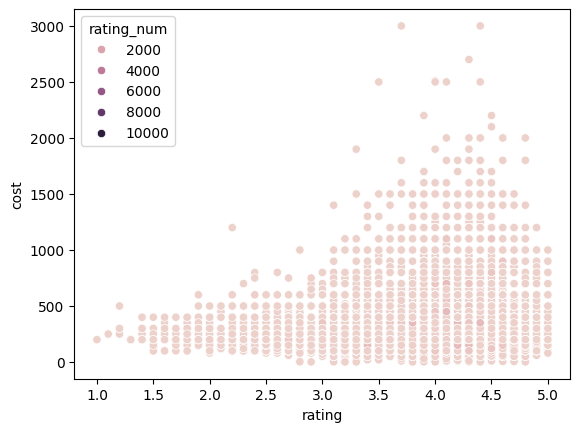

In [50]:
#cost vs rating
sns.scatterplot(x='rating', y='cost', hue='rating_num' , data=df)
plt.show()

C:\Users\bhata\AppData\Local\Temp\ipykernel_18228\4042782147.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cost'])


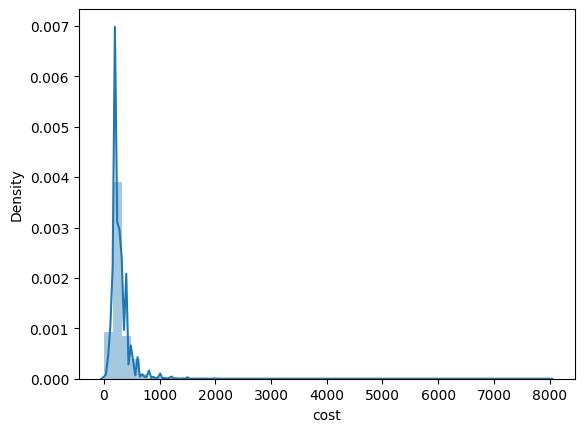

In [51]:
sns.distplot(df['cost'])
plt.show()
#left skewed
#almost 90% resturants serve @ less than 1000

<Axes: xlabel='rating_num', ylabel='rating'>

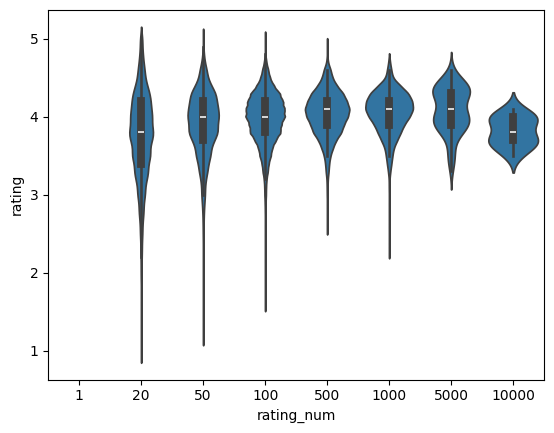

In [52]:
# relationship between rating_count and rating
sns.violinplot(x='rating_num', y='rating', data=df)

In [53]:
#word Cloud on name 
text = "".join(df['name'])


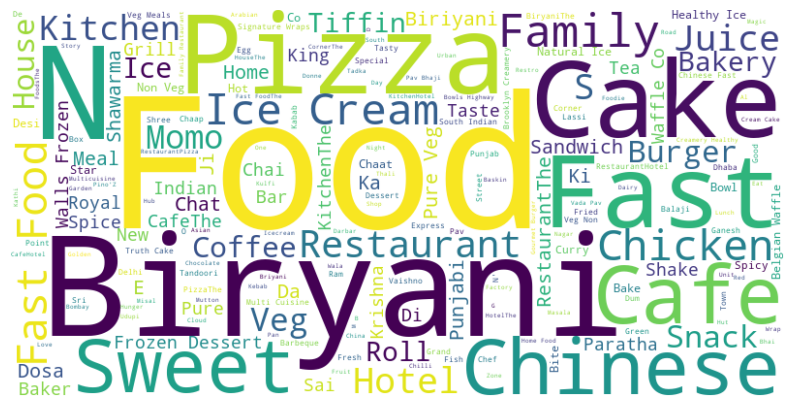

In [55]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wc = WordCloud(width=800, height=400,background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

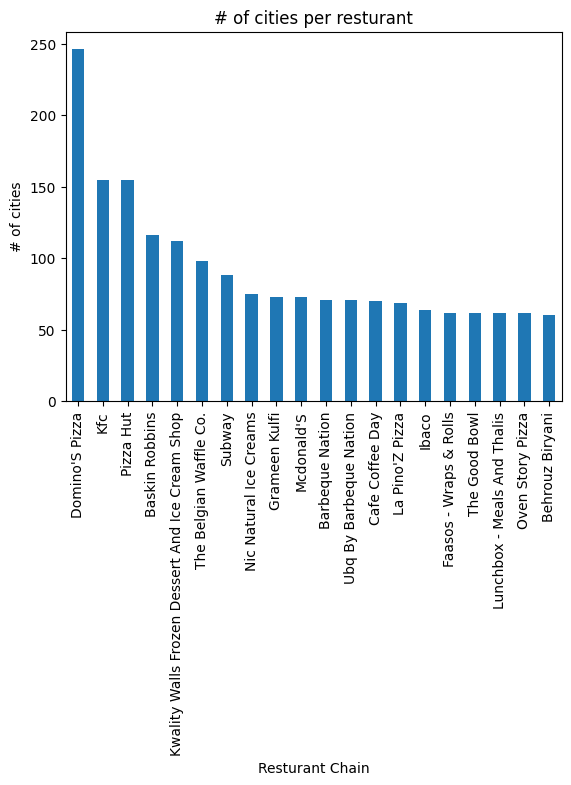

In [56]:
rest_counts = df.groupby('name')['city_final'].nunique().sort_values(ascending=False)[:20]
rest_counts.plot(kind='bar')
plt.title('# of cities per resturant')
plt.xlabel('Resturant Chain')
plt.ylabel('# of cities')
plt.show()